Original length of sample data is 4561
110 tests with Result, IPAddress, TotalScore = NaN dropped
Extra ip address dropped in 36 tests


<IPython.core.display.Javascript object>


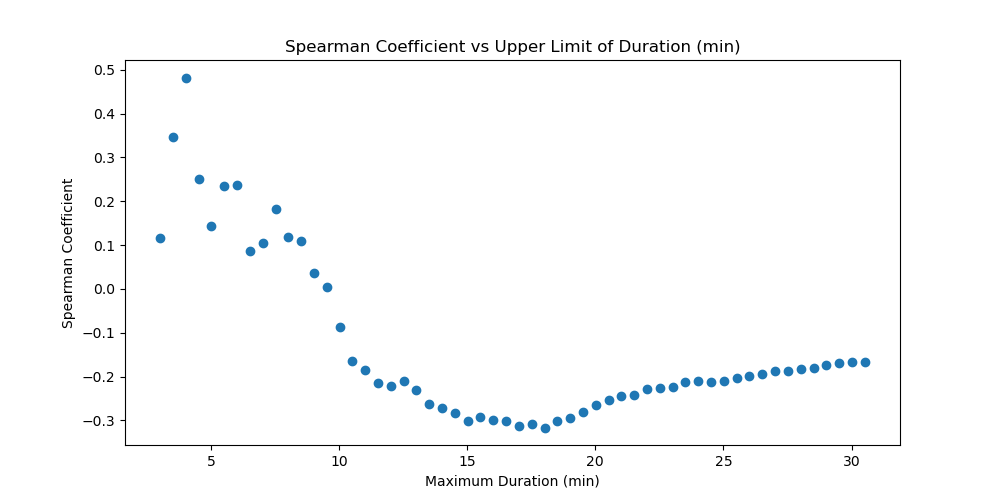

In [1]:
%matplotlib notebook
import mplcursors
import dmv_test_input
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Spearman_by_limit: Spearman correlations for range of test durations.
# Graphs show that % passing scores is higher when test duration is shorter.
# The pearson correlation is calculated for ranges of test duration decreased
# from full range to just 5 min.
class Spearman_by_limit():
    def duration(self, lo=5., hi=100., inc=5.):
        self.limits = np.arange(lo, hi+0.01*(hi-lo)/inc, inc)
    def __init__(self, df, hi=100., inc=5.):
        self.df = df
        self.duration(lo=self.df.duration.min(), hi=hi, inc=inc)
    def spearman(self, field):
        self.correlation = {}
        for limit in self.limits:
            self.short = self.df[self.df.duration <= limit]
            try:
                self.correlation[limit] = spearmanr(self.short["TotalScore"], self.short[field])[0]
            except:
                self.correlation[limit] = np.nan
        return self.correlation
    def __repr__(self):
        w = ""
        for lim, v in self.correlation.items():
            w += f"Highest duration: {lim:>6}   spearman_correlation: {v:>8f}\n"
        return w

def plot_spearman(df):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.plot(df.limits, df.correlation.values(), "o")
    mplcursors.cursor(hover=True)
    ax.set_title("Spearman Coefficient vs Upper Limit of Duration (min)")
    ax.set_xlabel("Maximum Duration (min)")
    ax.set_ylabel("Spearman Coefficient")
    plt.show()
    
def main():
    df, risk = dmv_test_input.dmv_risk_input()

    spearman = Spearman_by_limit(df, hi=30., inc=0.5)
    correlation = spearman.spearman("duration")
    plot_spearman(spearman)
    
main()
